In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from google.colab import drive
import os

In [2]:

# Step 1: Mount Google Drive to access the shared folder
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:

# Step 2: Define the path to the dataset folder (replace with the correct path)
dataset_path = '/content/drive/MyDrive/Artificial_Intelligence/1-Machine_Learning/Unsupervised_Machine_Learning/Clustering/Human_Activity_Recognition_Using_Smartphones/HAR_Dataset/'  # Modify this based on the actual folder structure


In [4]:
# Step 3: Load the training and testing data files
if os.path.exists(dataset_path + 'train/X_train.txt'): # checks if the file exists
    X_train = pd.read_csv(dataset_path + 'train/X_train.txt', delim_whitespace=True, header=None)
    y_train = pd.read_csv(dataset_path + 'train/y_train.txt', delim_whitespace=True, header=None)

    X_test = pd.read_csv(dataset_path + 'test/X_test.txt', delim_whitespace=True, header=None)
    y_test = pd.read_csv(dataset_path + 'test/y_test.txt', delim_whitespace=True, header=None)
else:
    print(f"Error: File not found: {dataset_path + 'train/X_train.txt'}") # prints an error message if the file does not exist

<ipython-input-4-d8936fde4da3>:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv(dataset_path + 'train/X_train.txt', delim_whitespace=True, header=None)
<ipython-input-4-d8936fde4da3>:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_train = pd.read_csv(dataset_path + 'train/y_train.txt', delim_whitespace=True, header=None)
<ipython-input-4-d8936fde4da3>:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test = pd.read_csv(dataset_path + 'test/X_test.txt', delim_whitespace=True, header=None)
<ipython-input-4-d8936fde4da3>:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_test = 

In [5]:

# Step 4: Combine the training and test data into a single DataFrame
X = pd.concat([X_train, X_test], axis=0).reset_index(drop=True)
y = pd.concat([y_train, y_test], axis=0).reset_index(drop=True)


In [6]:

print("Original X shape:", X.shape)
print("Original y shape:", y.shape)

print("Missing values:\n", X.isnull().sum().sum())

Original X shape: (10299, 561)
Original y shape: (10299, 1)
Missing values:
 0


In [7]:
# Step 5: Feature selection (example using correlation)

"""
correlation_matrix = X.corr().abs()
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
X_selected = X.drop(to_drop, axis=1)
print("After feature selection, X shape:", X_selected.shape)

"""

X_selected = X
print("Skip feature selection, X shape:", X_selected.shape)

Skip feature selection, X shape: (10299, 561)


In [8]:
# Step 6: Outlier detection and removal (example using IQR method)
"""
Q1 = X_selected.quantile(0.25)
Q3 = X_selected.quantile(0.75)
IQR = Q3 - Q1
outlier_mask = ~((X_selected < (Q1 - 1.5 * IQR)) | (X_selected > (Q3 + 1.5 * IQR))).any(axis=1)
X_clean = X_selected[outlier_mask]
y_clean = y[outlier_mask]

print("After outlier removal, X shape:", X_clean.shape)
print("After outlier removal, y shape:", y_clean.shape)

"""
X_clean = X_selected
y_clean = y
print("skip outlier removal, X shape:", X_clean.shape)
print("skip outlier removal, y shape:", y_clean.shape)

skip outlier removal, X shape: (10299, 561)
skip outlier removal, y shape: (10299, 1)


In [9]:

# Step 7: Normalize the features (using StandardScaler or MinMaxScaler or RobustScaler )

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clean)
"""

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))  # This ensures scaling from 0 to 1
X_scaled = scaler.fit_transform(X_clean)

"""


"""
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_clean)
"""


print("After scaling, X shape:", X_scaled.shape)


After scaling, X shape: (10299, 561)


In [10]:
# Step 8: Optional: Apply PCA for dimensionality reduction


from sklearn.decomposition import PCA
# Apply PCA and retain 95% of variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)
print("After PCA, X shape:", X_pca.shape)

"""
X_pca = X_scaled
print("Skip PCA, X shape:", X_pca.shape)
"""

After PCA, X shape: (10299, 104)


'\nX_pca = X_scaled\nprint("Skip PCA, X shape:", X_pca.shape)\n'

In [11]:
# Step 9: Mapping activity labels for readability
activity_labels = {
    1: 'WALKING',
    2: 'WALKING_UPSTAIRS',
    3: 'WALKING_DOWNSTAIRS',
    4: 'SITTING',
    5: 'STANDING',
    6: 'LAYING'
}

y_mapped = pd.Series(y_clean[0]).map(activity_labels)
print("y_mapped shape:", y_mapped.shape)
print("y_mapped:", y_mapped)

y_mapped shape: (10299,)
y_mapped: 0                STANDING
1                STANDING
2                STANDING
3                STANDING
4                STANDING
               ...       
10294    WALKING_UPSTAIRS
10295    WALKING_UPSTAIRS
10296    WALKING_UPSTAIRS
10297    WALKING_UPSTAIRS
10298    WALKING_UPSTAIRS
Name: 0, Length: 10299, dtype: object


In [12]:

# Step 10: Display the preprocessed data
print("Preprocessed data shape (after PCA, if applied):", X_pca.shape)
print("Sample activity labels:", y_mapped.head(10))


Preprocessed data shape (after PCA, if applied): (10299, 104)
Sample activity labels: 0    STANDING
1    STANDING
2    STANDING
3    STANDING
4    STANDING
5    STANDING
6    STANDING
7    STANDING
8    STANDING
9    STANDING
Name: 0, dtype: object


TSNE shape: (10299, 2)


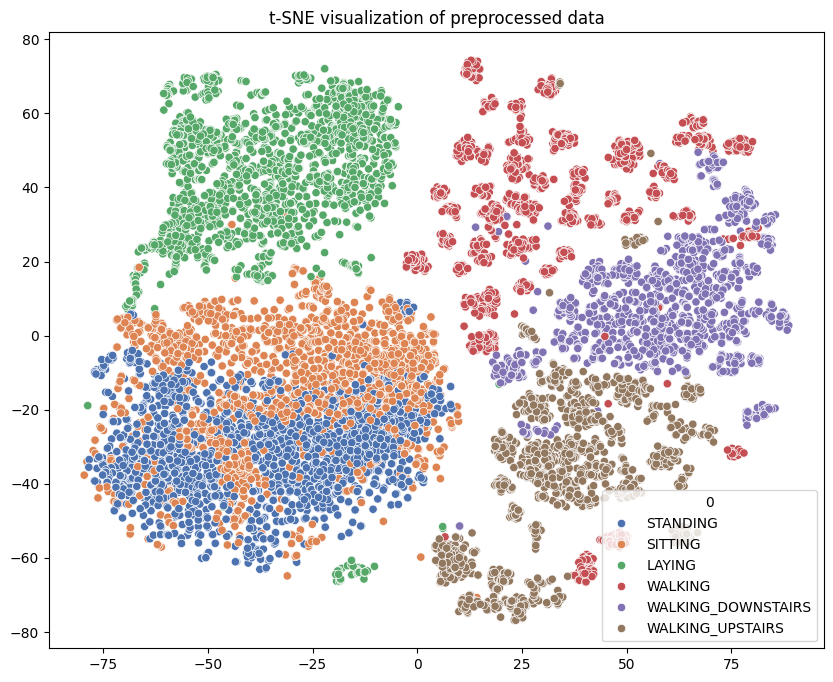

In [13]:
# Step 11: Visualize the data
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_pca)
print("TSNE shape:", X_tsne.shape)

plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y_mapped, palette='deep')
plt.title('t-SNE visualization of preprocessed data')
plt.show()

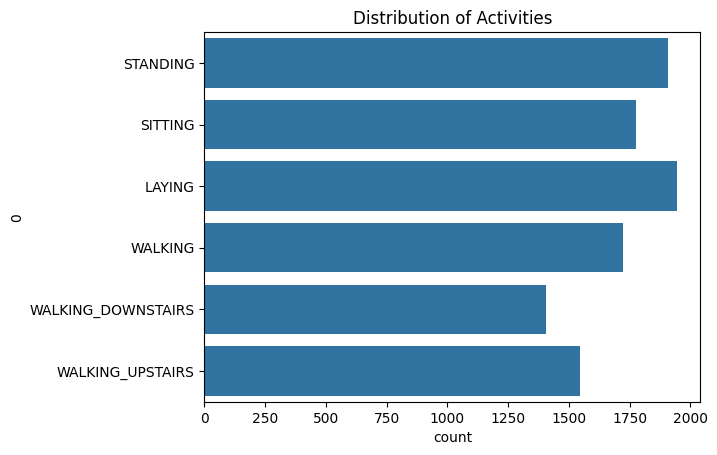

In [14]:

# Step 12: Plotting distribution of activities
sns.countplot(y_mapped)
plt.title('Distribution of Activities')
plt.show()


In [15]:
#Step 13: Import necessary clustering libraries
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, MeanShift
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# **Methods to find optimal K for K means**:

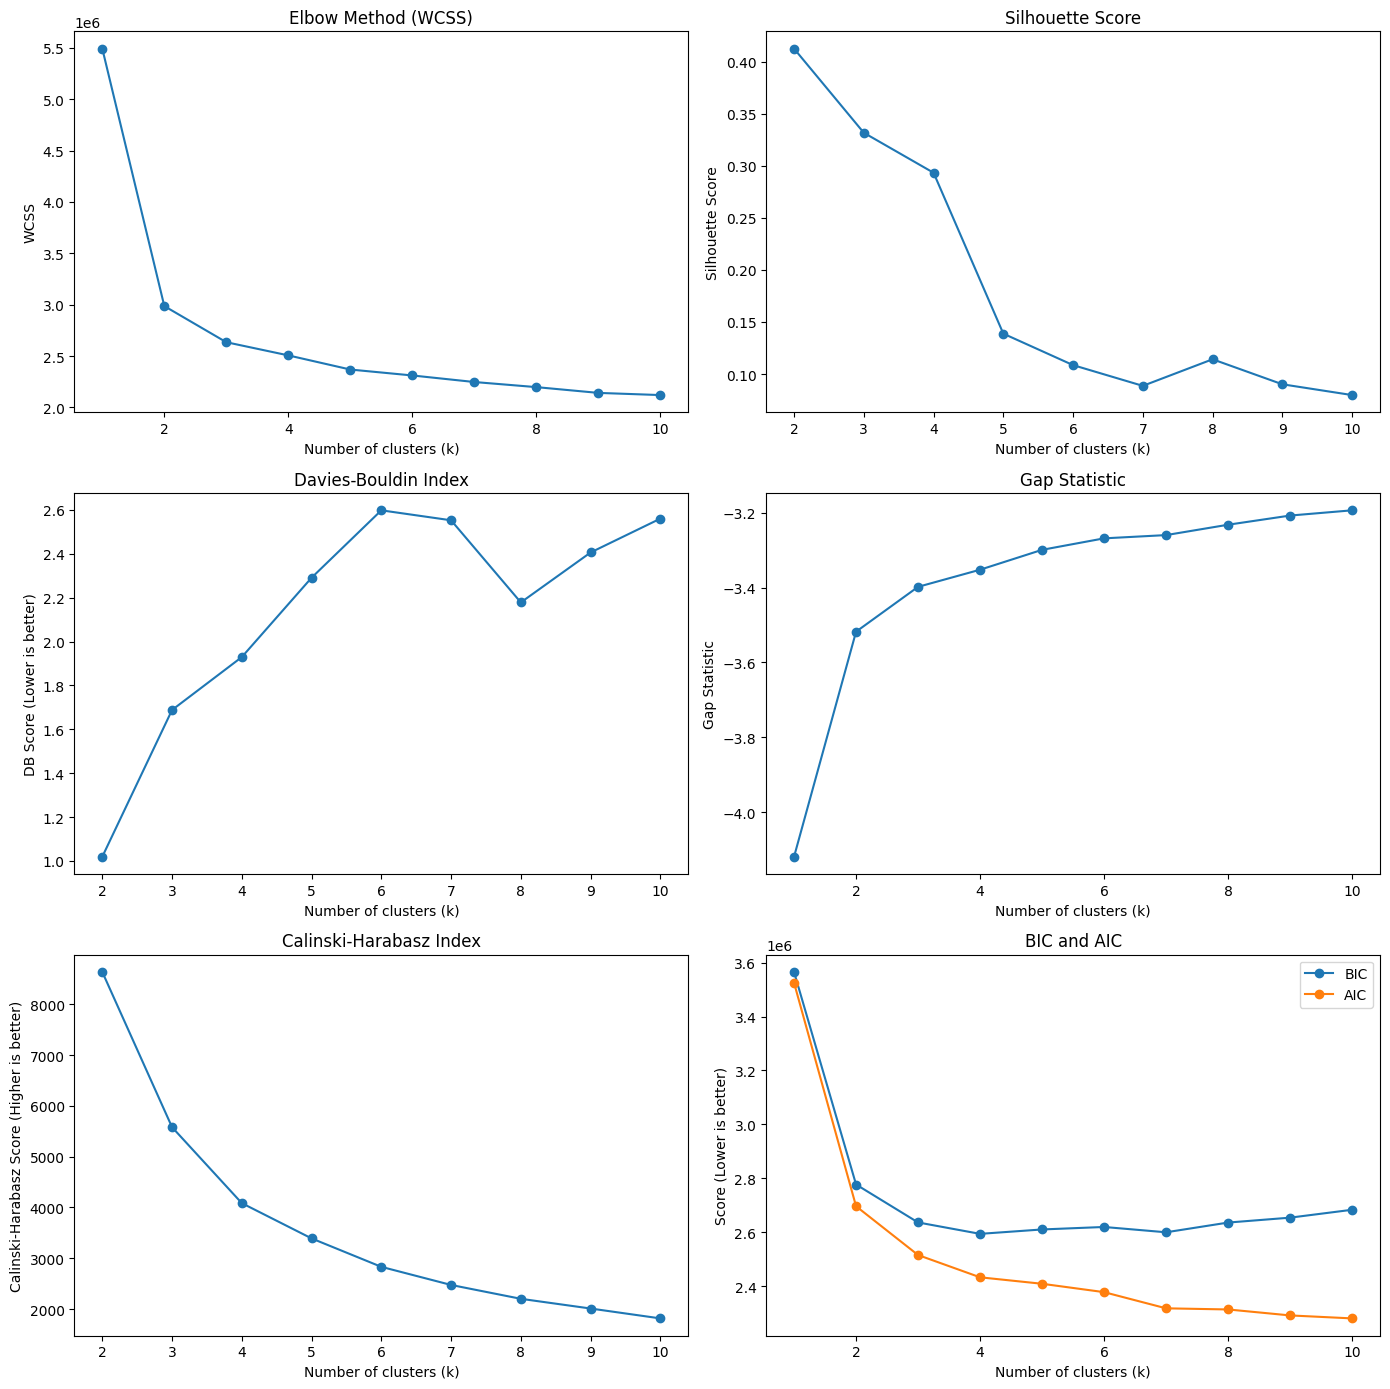

Optimal k from Elbow Method: 7
Optimal k from Silhouette Method: 2
Optimal k from Davies-Bouldin Method: 2
Optimal k from Gap Statistic: 10
Optimal k from Calinski-Harabasz Index: 2
Optimal k from BIC: 4
Optimal k from AIC: 10

Most frequent optimal k: 2


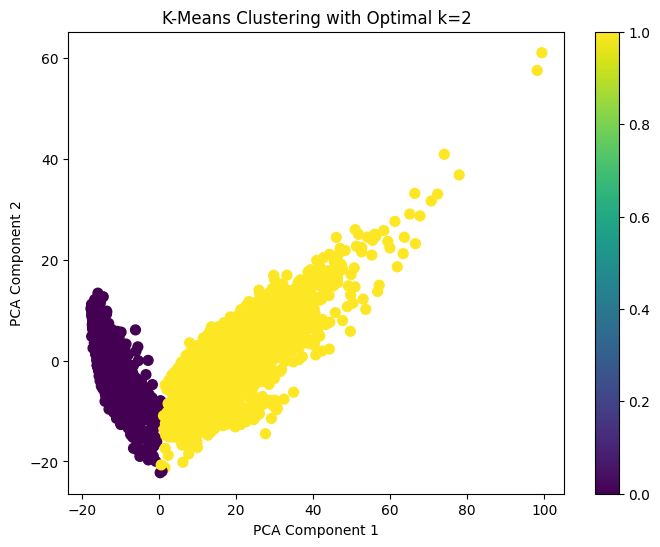

In [16]:

# Function to compute the Elbow Method
def elbow_method(X, max_k=10):
    wcss = []
    for k in range(1, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)

    # Return the WCSS list
    return wcss



# Function to compute the Silhouette Method
def silhouette_method(X, max_k=10):
    silhouette_scores = []
    for k in range(2, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(X)
        silhouette_scores.append(silhouette_score(X, labels))

    # Return the silhouette scores
    return silhouette_scores



# Function to compute the Davies-Bouldin Index
def davies_bouldin_method(X, max_k=10):
    db_scores = []
    for k in range(2, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(X)
        db_scores.append(davies_bouldin_score(X, labels))

    # Return the Davies-Bouldin scores
    return db_scores



# Function to compute the Calinski-Harabasz Index
def calinski_harabasz_method(X, max_k=10):
    ch_scores = []
    for k in range(2, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(X)
        ch_scores.append(calinski_harabasz_score(X, labels))

    # Return the Calinski-Harabasz scores
    return ch_scores



# Function to compute the Gap Statistic
def gap_statistic(X, max_k=10):
    def compute_gap(X, kmeans_model, refs, nrefs):
        kmeans_model.fit(X)
        Wk = np.log(kmeans_model.inertia_)
        Wk_refs = np.zeros(nrefs)
        for i in range(nrefs):
            random_data = np.random.random_sample(size=X.shape)
            kmeans_model.fit(random_data)
            Wk_refs[i] = np.log(kmeans_model.inertia_)
        gap = np.mean(Wk_refs) - Wk
        return gap

    gaps = []
    for k in range(1, max_k+1):
        kmeans_model = KMeans(n_clusters=k)
        gap = compute_gap(X, kmeans_model, refs=10, nrefs=5)
        gaps.append(gap)


    return gaps



# Function to compute BIC/AIC using Gaussian Mixture Model
def bic_aic_method(X, max_k=10):
    bic_scores = []
    aic_scores = []
    for k in range(1, max_k+1):
        gmm = GaussianMixture(n_components=k, random_state=42)
        gmm.fit(X)
        bic_scores.append(gmm.bic(X))
        aic_scores.append(gmm.aic(X))

    return bic_scores, aic_scores



    # Function to plot all metrics together
def plot_all_metrics(wcss, silhouette_scores, db_scores, gap_scores, ch_scores, bic_scores, aic_scores, max_k=10):
    fig, axs = plt.subplots(3, 2, figsize=(14, 14))  # 3 rows, 2 columns

    # Elbow Method (WCSS)
    axs[0, 0].plot(range(1, max_k+1), wcss, marker='o')
    axs[0, 0].set_title('Elbow Method (WCSS)')
    axs[0, 0].set_xlabel('Number of clusters (k)')
    axs[0, 0].set_ylabel('WCSS')

    # Silhouette Score
    axs[0, 1].plot(range(2, max_k+1), silhouette_scores, marker='o')
    axs[0, 1].set_title('Silhouette Score')
    axs[0, 1].set_xlabel('Number of clusters (k)')
    axs[0, 1].set_ylabel('Silhouette Score')

    # Davies-Bouldin Index
    axs[1, 0].plot(range(2, max_k+1), db_scores, marker='o')
    axs[1, 0].set_title('Davies-Bouldin Index')
    axs[1, 0].set_xlabel('Number of clusters (k)')
    axs[1, 0].set_ylabel('DB Score (Lower is better)')

    # Gap Statistic
    axs[1, 1].plot(range(1, max_k+1), gap_scores, marker='o')
    axs[1, 1].set_title('Gap Statistic')
    axs[1, 1].set_xlabel('Number of clusters (k)')
    axs[1, 1].set_ylabel('Gap Statistic')

    # Calinski-Harabasz Index
    axs[2, 0].plot(range(2, max_k+1), ch_scores, marker='o')
    axs[2, 0].set_title('Calinski-Harabasz Index')
    axs[2, 0].set_xlabel('Number of clusters (k)')
    axs[2, 0].set_ylabel('Calinski-Harabasz Score (Higher is better)')

    # BIC/AIC
    axs[2, 1].plot(range(1, max_k+1), bic_scores, marker='o', label='BIC')
    axs[2, 1].plot(range(1, max_k+1), aic_scores, marker='o', label='AIC')
    axs[2, 1].set_title('BIC and AIC')
    axs[2, 1].set_xlabel('Number of clusters (k)')
    axs[2, 1].set_ylabel('Score (Lower is better)')
    axs[2, 1].legend()

    plt.tight_layout()
    plt.show()

# Function to assign the most frequent optimal k across all methods
def assign_best_k(wcss, silhouette_scores, db_scores, gap_scores, ch_scores, bic_scores, aic_scores, max_k=10):
    # Find the elbow point for the WCSS method
    elbow_k = np.argmin(np.gradient(np.gradient(wcss))) + 1  # Using second derivative

    # Best k for silhouette method
    silhouette_k = np.argmax(silhouette_scores) + 2  # Silhouette starts from k=2

    # Best k for Davies-Bouldin method
    davies_bouldin_k = np.argmin(db_scores) + 2  # DB score starts from k=2

    # Best k for Gap Statistic
    gap_k = np.argmax(gap_scores) + 1

    # Best k for Calinski-Harabasz method
    ch_k = np.argmax(ch_scores) + 2  # Calinski-Harabasz starts from k=2

    # Best k for BIC/AIC method
    bic_k = np.argmin(bic_scores) + 1
    aic_k = np.argmin(aic_scores) + 1

    # Store all k values in a list
    all_k = [elbow_k, silhouette_k, davies_bouldin_k, gap_k, ch_k, bic_k, aic_k]

    # Find the most frequent k
    best_k = max(set(all_k), key=all_k.count)

    print(f"Optimal k from Elbow Method: {elbow_k}")
    print(f"Optimal k from Silhouette Method: {silhouette_k}")
    print(f"Optimal k from Davies-Bouldin Method: {davies_bouldin_k}")
    print(f"Optimal k from Gap Statistic: {gap_k}")
    print(f"Optimal k from Calinski-Harabasz Index: {ch_k}")
    print(f"Optimal k from BIC: {bic_k}")
    print(f"Optimal k from AIC: {aic_k}")
    print(f"\nMost frequent optimal k: {best_k}")

    return best_k



# Main script to run all methods and find the best k
max_k = 10  # Define the maximum number of clusters to test

# Apply all the methods to find the optimal k
wcss = elbow_method(X_pca, max_k)
silhouette_scores = silhouette_method(X_pca, max_k)
db_scores = davies_bouldin_method(X_pca, max_k)
gap_scores = gap_statistic(X_pca, max_k)
ch_scores = calinski_harabasz_method(X_pca, max_k)
bic_scores, aic_scores = bic_aic_method(X_pca, max_k)

# Plot all metrics in one figure
plot_all_metrics(wcss, silhouette_scores, db_scores, gap_scores, ch_scores, bic_scores, aic_scores, max_k)

# Find the most frequent k
best_k = assign_best_k(wcss, silhouette_scores, db_scores, gap_scores, ch_scores, bic_scores, aic_scores, max_k)

# Train K-Means with the best k
kmeans_best = KMeans(n_clusters=best_k, random_state=42)
kmeans_best.fit(X_pca)

# Plot the final clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_best.labels_, cmap='viridis', s=50)
plt.title(f"K-Means Clustering with Optimal k={best_k}")
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()


In [ ]:
def tune_dbscan(X_scaled):
    best_score = -1
    best_params = {'eps': 0.5, 'min_samples': 5}  # Initialize with default DBSCAN parameters

    # Extended grid search for the best eps and min_samples
    for eps in np.arange(0.1, 5.0, 0.2):  # Expand the eps range from 0.1 to 5.0
        for min_samples in range(5, 30):  # Extend min_samples up to 30
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(X_scaled)

            # Check if DBSCAN found more than one cluster (ignoring noise)
            if len(set(labels)) > 1 and len(set(labels)) < len(X_scaled):
                score = silhouette_score(X_scaled, labels)

                # Keep track of the best parameters based on silhouette score
                if score > best_score:
                    best_score = score
                    best_params = {'eps': eps, 'min_samples': min_samples}

    # Check if best_params were updated. If not, use initial values
    if best_params['eps'] == 0.5 and best_params['min_samples'] == 5:
        print(f"DBSCAN failed to find clusters. Using default parameters: {best_params}, Silhouette Score: {best_score:.3f}")
    else:
        print(f"Best params for DBSCAN: {best_params}, Silhouette Score: {best_score:.3f}")

    return best_params

best_dbscan_params = tune_dbscan(X_pca)

In [18]:

# Step 16: Define clustering algorithms in a list
clustering_algorithms = [
    ('KMeans', KMeans(n_clusters=6, random_state=42)),  # K = 6 for the 6 activities
    ('Hierarchical', AgglomerativeClustering(n_clusters=6)),
    ('DBSCAN', DBSCAN(eps= 0.5, min_samples=5)),
    ('MeanShift', MeanShift()),
    ('GMM', GaussianMixture(n_components=6, random_state=42))  # GMM with 6 components
]



KMeans - Silhouette Score: 0.109


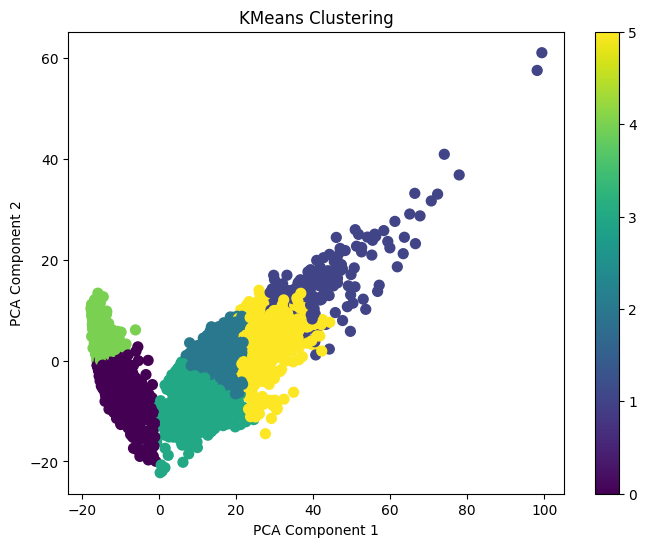

Hierarchical - Silhouette Score: 0.117


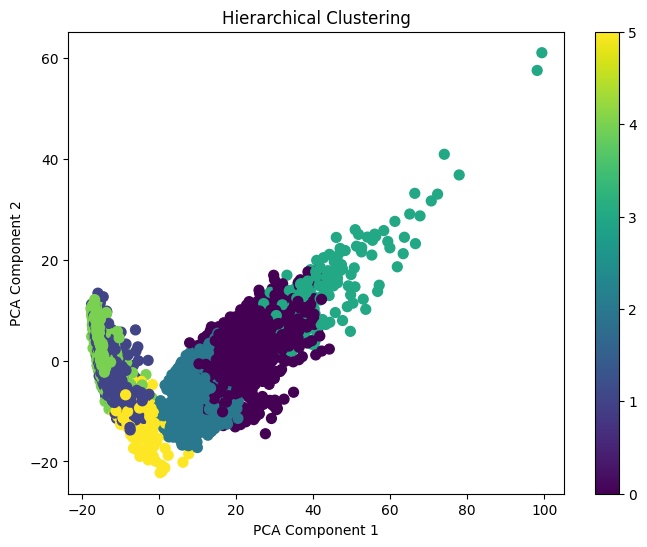

DBSCAN did not form distinct clusters.


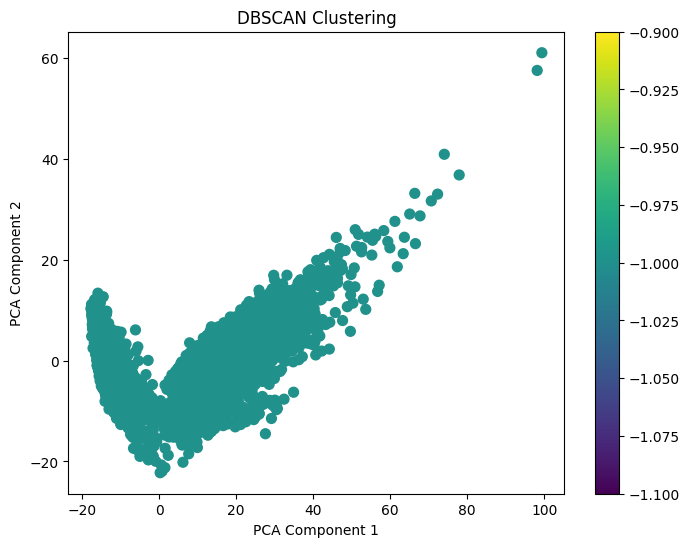

MeanShift - Silhouette Score: 0.305


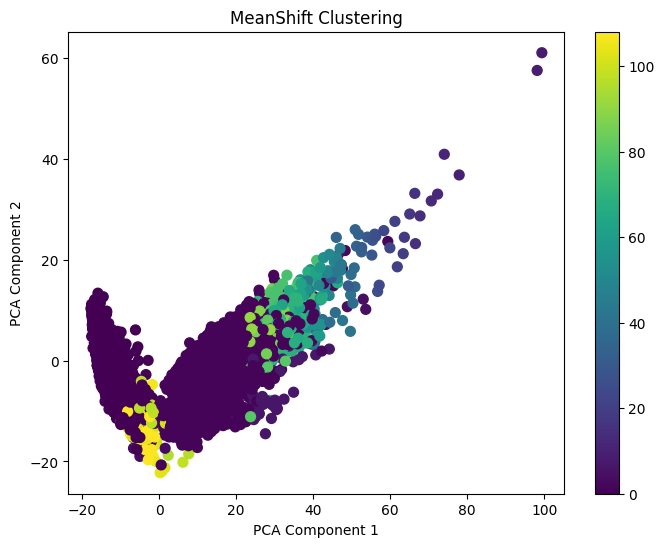

GMM - Silhouette Score: 0.114


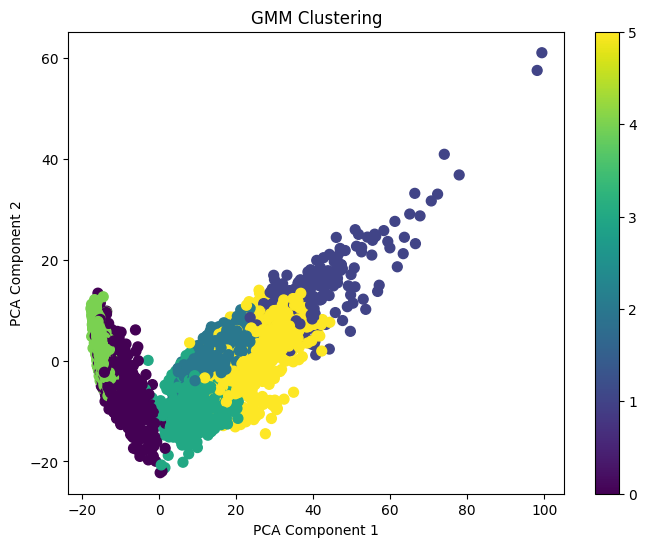

In [19]:

# Step 17: Train and evaluate each algorithm using a for loop
for name, algorithm in clustering_algorithms:
    # Fit the clustering algorithm to the preprocessed data (PCA or scaled)
    if name in ['GMM']:
        labels = algorithm.fit_predict(X_pca)  # GMM requires fit_predict
    else:
        labels = algorithm.fit_predict(X_pca)  # For others

    # Step 13: Evaluate the clustering result using silhouette score
    if len(set(labels)) > 1:  # Check if more than 1 cluster was formed
        silhouette_avg = silhouette_score(X_pca, labels)
        print(f"{name} - Silhouette Score: {silhouette_avg:.3f}")
    else:
        print(f"{name} did not form distinct clusters.")

    # Step 14: Visualize the clusters (for first 2 components if PCA applied)
    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50)
    plt.title(f"{name} Clustering")
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.colorbar()
    plt.show()